### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv('data/Whickham.txt')

In [3]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [4]:
X = data[['smoker', 'age']]
y = data['outcome']

In [30]:
X = pd.concat([X,pd.get_dummies(X[['smoker']])], axis=1).drop(columns=['smoker'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [32]:
X_train.head()

,age,smoker_No,smoker_Yes
9,27,True,False
1227,63,False,True
345,38,True,False
668,60,False,True
903,27,False,True


In [33]:
dt = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [34]:
dt.get_depth()

13

In [44]:
[i for i in range(1,13)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [45]:
depths = [i for i in range(1,14)]
train_accuracy = []
test_accuracy = []

In [46]:
for depth in depths:
  dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth).fit(X_train, y_train)
  train_pred = dt.predict(X_train)
  test_pred = dt.predict(X_test)
  train_accuracy.append(accuracy_score(y_train, train_pred))
  test_accuracy.append(accuracy_score(y_test, test_pred))

In [56]:
result = pd.DataFrame({'depth': depths, 'train': train_accuracy, 'test': test_accuracy})

<Axes: xlabel='depth', ylabel='value'>

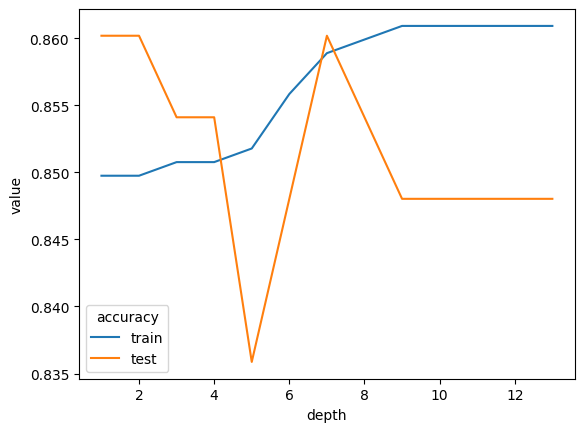

In [57]:
sns.lineplot(result.melt(['depth'], var_name='accuracy'), x='depth', y='value', hue='accuracy')